# Protection of personal data of customers

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Research-goal-and-work-plan" data-toc-modified-id="Research-goal-and-work-plan-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Research goal and work plan</a></span></li><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading data</a></span></li><li><span><a href="#Matrix-multiplication--" data-toc-modified-id="Matrix-multiplication---3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Matrix multiplication <a id="justification" rel="nofollow"> </a></a></span></li><li><span><a href="#Conversion-algorithm" data-toc-modified-id="Conversion-algorithm-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conversion algorithm</a></span></li><li><span><a href="#Algorithm-verification" data-toc-modified-id="Algorithm-verification-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Algorithm verification</a></span><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Features-Encryption" data-toc-modified-id="Features-Encryption-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Features Encryption</a></span></li><li><span><a href="#Feature-scaling" data-toc-modified-id="Feature-scaling-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Feature scaling</a></span></li><li><span><a href="#Linear-regression-for-data-before-transformation" data-toc-modified-id="Linear-regression-for-data-before-transformation-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Linear regression for data before transformation</a></span></li><li><span><a href="#Linear-regression-for-data-after-transformation" data-toc-modified-id="Linear-regression-for-data-after-transformation-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Linear regression for data after transformation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Results-of-the-study-and-general-conclusion" data-toc-modified-id="Results-of-the-study-and-general-conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Results of the study and general conclusion</a></span></li></ul></div>

## Research goal and work plan

**Task**  

It is necessary to protect the data of the clients of the insurance company. Develop a data transformation method that makes it difficult to recover personal information from it. Justify the correctness of his work.  

You need to protect the data so that the quality of the machine learning models does not deteriorate during the transformation. There is no need to select the best model. 

**Data description**  

*Features:* gender, age and salary of the insured, the number of members of his family.  
*Target feature:* the number of insurance payments to the client over the past 5 years.

**Research plan**
1. Download and explore data.  
2. Answer the question and justify the decision.  
The features are multiplied by an invertible matrix. Will the quality of linear regression change? (It can be retrained.)  
a. Will change. Give examples of matrices.  
b. Will not change. Specify how the linear regression parameters are related in the original problem and in the transformed one.  
3. Suggest a data transformation algorithm for solving the problem. Justify why the quality of the linear regression will not change.  
4. Program this algorithm by applying matrix operations. Check that the quality of the linear regression from sklearn is not different before and after the transformation. Apply the R2 metric.

## Loading data

We import the necessary libraries for the study.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Let's download and examine the data.

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Feature names are incorrect. Let's change the names of the features.

In [3]:
df.columns = ['gender', 'age', 'salary', 'family_members', 'insurance_pays']
df.head()

,gender,age,salary,family_members,insurance_pays
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.shape

(5000, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          5000 non-null   int64  
 1   age             5000 non-null   float64
 2   salary          5000 non-null   float64
 3   family_members  5000 non-null   int64  
 4   insurance_pays  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In the `age` and `salary` columns, the float data type can be replaced with int. Make sure all values in the `salary` column are integers.

In [6]:
# find the remainder of division by 1 for the entire column
fractional_salary = df['salary'] % 1.0

# if the remainder is not equal to 0, then the number has a fractional part. Let's display these numbers on the screen.
df['salary'].loc[fractional_salary[fractional_salary != 0].index] #

80      32700.0
159     64900.0
313     32700.0
392     32700.0
448     32700.0
772     65100.0
820     32200.0
872     32200.0
911     32200.0
963     64100.0
1020    32700.0
1078    32200.0
1336    32700.0
1485    32700.0
1486    32200.0
1847    32700.0
1981    32200.0
2191    32200.0
2287    32200.0
2342    32700.0
2385    32700.0
2439    32200.0
2443    32700.0
2805    32700.0
2994    32200.0
3063    64400.0
3139    32200.0
3352    32200.0
3466    32700.0
3499    65100.0
3614    32700.0
3717    32700.0
3788    32700.0
3824    32700.0
3938    32200.0
4182    32200.0
4520    32700.0
4833    32200.0
4935    32700.0
4998    32700.0
Name: salary, dtype: float64

We see that numbers where the remainder of division by 1 is not equal to zero are also integers !!! This means that the remainder is a very small number that tends to zero due to the peculiarities of storing numbers in float format. Let's convert the data types in the dataframe columns to optimize resource costs.

In [7]:
df[['age', 'salary']] = df[['age', 'salary']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          5000 non-null   int64
 1   age             5000 non-null   int32
 2   salary          5000 non-null   int32
 3   family_members  5000 non-null   int64
 4   insurance_pays  5000 non-null   int64
dtypes: int32(2), int64(3)
memory usage: 156.4 KB


In [8]:
df.describe()

,gender,age,salary,family_members,insurance_pays
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


We examine the sample for multicollinearity of features. Let's build a feature correlation matrix.

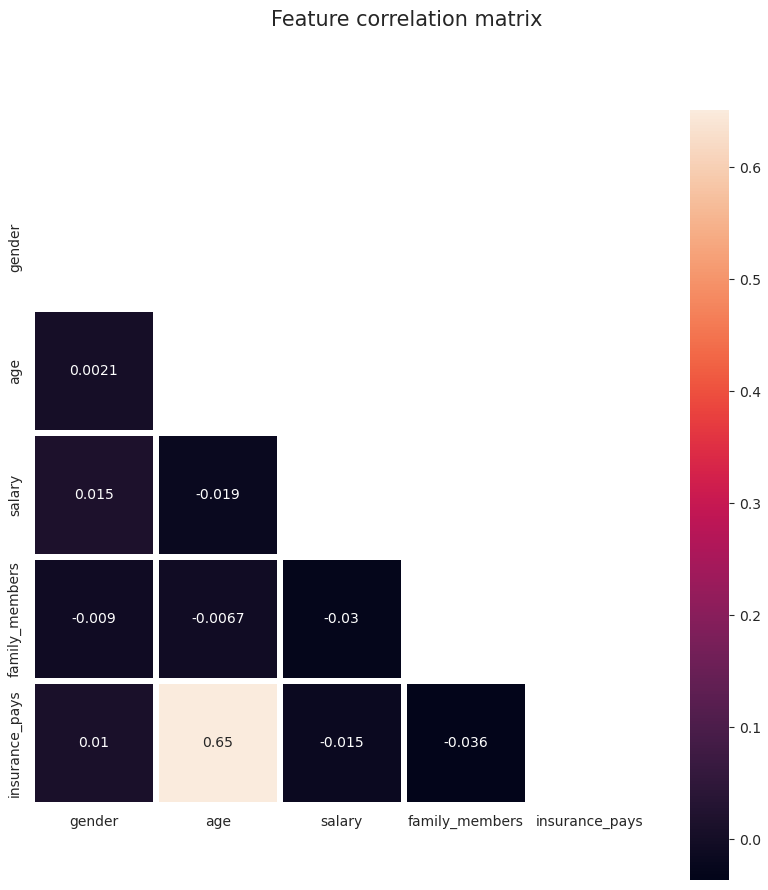

In [9]:
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    plt.suptitle('Feature correlation matrix', fontsize=15);
    ax = sns.heatmap(df_corr, mask=mask, square=True, annot=True, linewidths=3, linecolor='white')

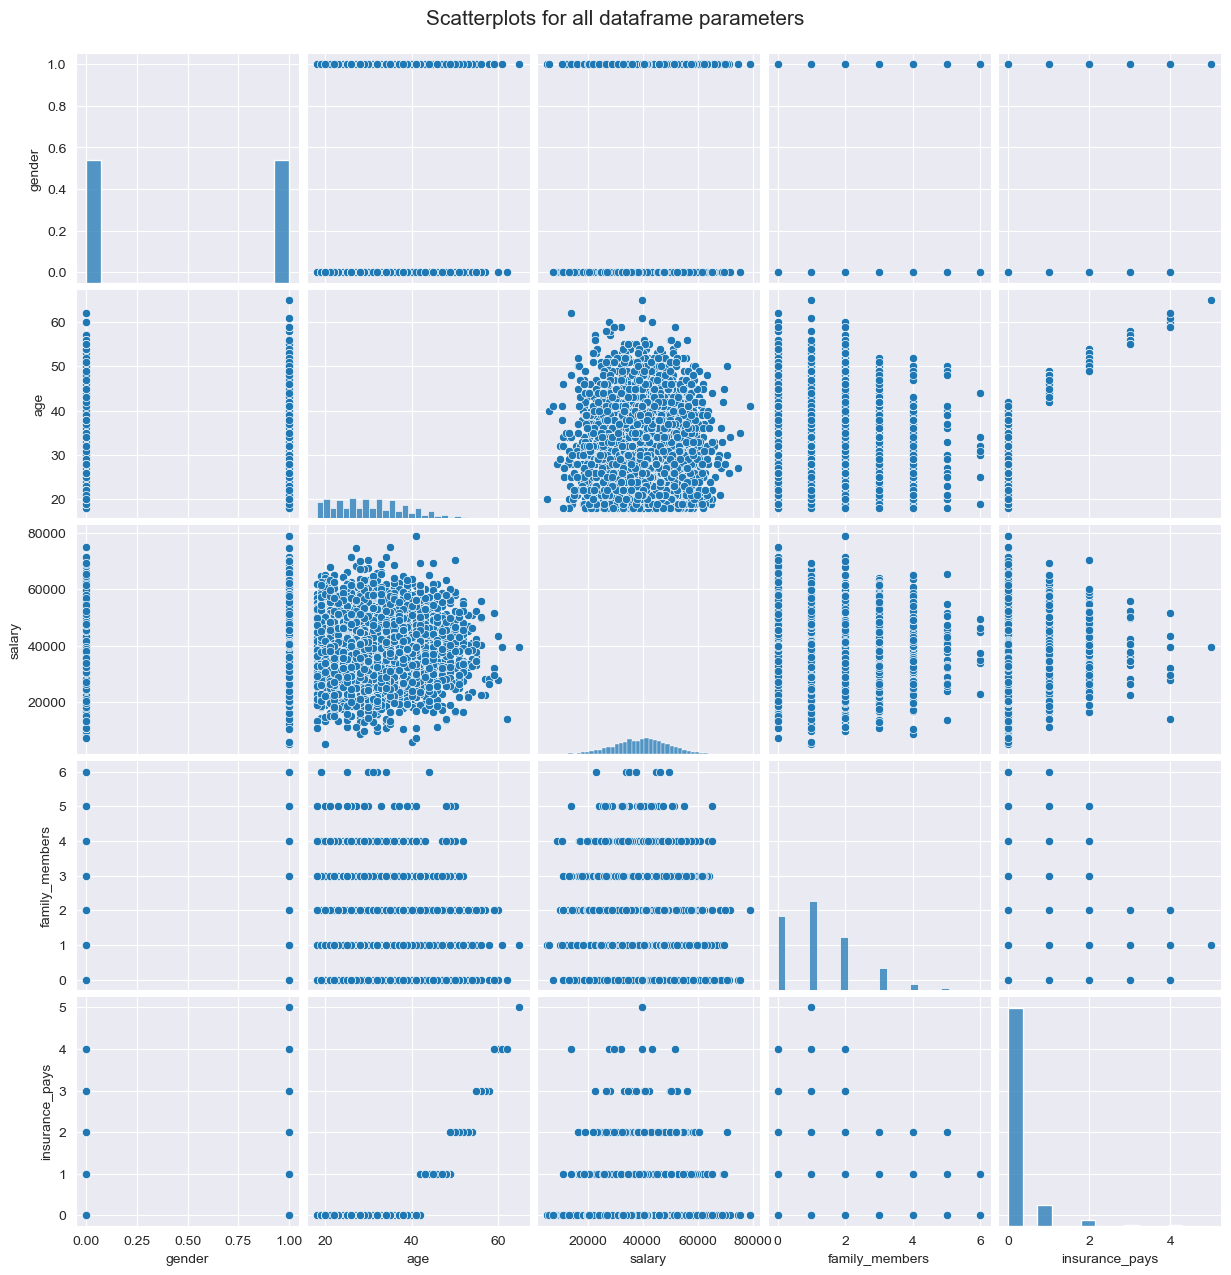

In [10]:
sns.set_style('darkgrid')
sns.pairplot(df, height=2.5, diag_kind='hist')
plt.suptitle('Scatterplots for all dataframe parameters', y=1.02, fontsize=15)
plt.show()

The features age and insurance_pays have a weak linear positive relationship, Pearson's correlation coefficient is 0.65, but the relationship between the feature and the target feature is valid. It is logical that with increasing age, the number of payments also increases. There is no relationship between other features. There is no multicollinearity.

**Conclusion:** 
1) in the table, the names of features were corrected from Cyrillic to Latin, "snake" format;  
2) there are 5000 rows and 5 columns in the sample;  
3) there are no gaps in the data, gap processing is not required;  
4) the data types in the `age` and `salary` columns were converted from *flaot* to *int*;  
5) columns with numeric data `age`, `salary`, `family_members` and `insurance_pays` do not have outliers, processing of abnormal values is not required;  
6) the dataframe was checked for feature multicollinearity - there is no multicollinearity.

## Matrix multiplication <a id='justification'> </a>

Designations:

- $X$ - feature matrix (zero column consists of ones)

- $y$ — target feature vector

- $P$ — the matrix by which features are multiplied

- $w$ — vector of linear regression weights (zero element equals shift)

Predictions:

$$
a = Xw
$$

Learning objective:

$$
w = \arg\min_w MSE(Xw, y)
$$

Learning formula:

$$
w = (X^T X)^{-1} X^T y
$$

**Question:** Features are multiplied by an invertible matrix. Will the quality of linear regression change?

**Answer:** b. Will not change.

**Rationale:**
Let's find how the linear regression parameters are related in the original problem and in the transformed one.

Let $A$ be an invertible matrix and $w_{A}$ be the linear regression parameter for the transformed matrix.
Let us write the formula for the linear regression parameter for $X$ multiplied by the invertible matrix $A$.

$$
w_{A} = ((XA)^TXA)^{-1}(XA)^Ty
$$

We transform the right side of the formula using the properties of the matrix transposition operation and the inverse matrix, and remembering that the inverse matrix can only be square:

$$
(AB)^T = B^TA^T
$$

$$
(ABC)^{-1} = C^{-1}B^{-1}A^{-1}
$$

$$
w_{A} = ((XA)^TXA)^{-1}(XA)^Ty = (A^{T}(X^{T}X)A)^{-1}A^{T}X ^{T}y = A^{-1}(X^{T}X)^{-1}(A^{T})^{-1}A^{T}X^{T}y = A ^{-1}(X^TX)^{-1}X^Ty
$$


Thus, the linear regression parameters for the original feature matrix and multiplied by the reversible matrix have the following relationship:

$$
w_{A} = A^{-1}(X^TX)^{-1}X^Ty = A^{-1}w
$$

Let's write the prediction formula for the transformed matrix:

$$
a_{A} = XAw_{A} = XAA^{-1}w = Xw = a
$$

The quality of linear regression will not change, since the prediction vector for the original feature matrix and multiplied by the reversible matrix is ​​the same vector.

## Conversion algorithm

**Algorithm for data protection**

1) randomly generate in a loop an invertible matrix ${A}$ of dimension n x n, where n is the number of features, until its determinant becomes nonzero, which means we have found an invertible matrix and the loop is interrupted;  
2) we multiply the feature matrix by the ${A}$ matrix and get the transformed feature matrix $X_{A}$;  
3) we scale features $X_{A}$;  
4) we train the model on the transformed features and get predictions.

**Rationale**

As it was already proved in [item 3](#justification), the quality of linear regression will not change, since the prediction vector for the original feature matrix and multiplied by the invertible matrix is the same vector. When multiplying the feature matrix X with dimensions $ (m\times 4) $ by the invertible matrix A with dimensions $(4\times 4)$, we get a new matrix, the elements of which are obtained as follows:  
$$
\dot{X_{11}} = X_{11} \times A_{11} + X_{12} \times A_{21} + X_{13} \times A_{31} + X_{14} \times A_{ 41}
$$
$$
\dot{X_{m4}} = X_{m1} \times A_{14} + X_{m2} \times A_{24} + X_{m3} \times A_{34} + X_{m4} \times A_{ 44}
$$

## Algorithm verification

Let's check that the quality of the linear regression from sklearn is the same before and after the transformation. We apply the R2 metric for evaluation.

### Data preparation

Let's prepare the data for training: we will separate the features and the target feature.

In [11]:
features = df.drop('insurance_pays', axis=1)
target = df['insurance_pays']

We divide the samples into training and test:

In [12]:
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.25, random_state=12345)
print(train_features.shape, test_features.shape)

(3750, 4) (1250, 4)


### Features Encryption

Let's program our algorithm to protect data while training the model. Let's create an Encryption class with functions `encrypt` to encrypt data and `decrypt` to decrypt it.
<a name="encryption"></a>

In [13]:
class Encryption:
    
    def encrypt(self, train_features, test_features):
        '''
        The method encrypts the training and test sets.
        The method generates a random matrix a and checks it for invertibility.
        A matrix is invertible if and only if it is nondegenerate, that is, its determinant is not equal to zero.
        The method returns the transformed matrix - the original matrix multiplied by the invertible matrix.
        The method saves the key matrix for decrypting client data
        '''
        n = train_features.shape[1]
        flag = True
        while flag:
            r = np.random.RandomState(12345)
            a = r.randint(10, size=(n,n))
            determinant = np.linalg.det(a)
            if determinant != 0:
                flag = False
        self.key = np.linalg.inv(a)
        self.train_features_columns = train_features.columns
        self.test_features_columns = test_features.columns
        encrypted_train_features = train_features.dot(a)
        encrypted_test_features = test_features.dot(a)
        return encrypted_train_features, encrypted_test_features
    
    def decrypt(self, train_features, test_features):
        '''
        The method decrypts the training and test sets.
        '''
        decrypted_train_features = np.round(train_features.dot(self.key)).astype(int)
        decrypted_train_features.columns = self.train_features_columns
        decrypted_test_features = np.round(test_features.dot(self.key)).astype(int)
        decrypted_test_features.columns = self.test_features_columns
        return decrypted_train_features, decrypted_test_features

Encrypt the data and display the first 5 rows of the training sample

In [14]:
encryption = Encryption()
encrypted_train_features, encrypted_test_features = encryption.encrypt(train_features, test_features)
encrypted_train_features.head()

,0,1,2,3
3369,217595,36420,325889,253456
1441,345908,57775,518469,403238
571,246894,41260,369966,287741
225,270930,45280,405974,315745
2558,303909,50765,455470,354251


As a result, customer data is encrypted.

Now let's check how the decryption works.

In [15]:
decrypted_train_features, decrypted_test_features = encryption.decrypt(encrypted_train_features, encrypted_test_features)
decrypted_train_features.head()

,gender,age,salary,family_members
3369,1,43,36200,1
1441,1,34,57600,0
571,0,32,41100,1
225,0,36,45100,1
2558,0,33,50600,2


Compare with the original training sample before the transformation.

In [16]:
train_features.head()

,gender,age,salary,family_members
3369,1,43,36200,1
1441,1,34,57600,0
571,0,32,41100,1
225,0,36,45100,1
2558,0,33,50600,2


### Feature scaling

Let's write a feature scaling function.

In [17]:
def scaling(train_features, test_features):
    '''
    The method performs the scaling of the features of the training and test samples by the method of data standardization.
    The method returns training and test sets with scaled features.
    '''
    scaler = StandardScaler()
    scaler.fit(train_features)
    train_features = scaler.transform(train_features)
    test_features = scaler.transform(test_features)
    return train_features, test_features

Feature scaling before transformation.

In [18]:
train_features_scaled, test_features_scaled = scaling(
    train_features, test_features)

Feature scaling after transformation.

In [19]:
encrypted_train_features_scaled, encrypted_test_features_scaled = scaling(
    encrypted_train_features, encrypted_test_features)

### Linear regression for data before transformation

In [20]:
model = LinearRegression()
model.fit(train_features_scaled, train_target)
predictions = model.predict(test_features_scaled)
result = pd.DataFrame({'Linear regression before transformation' : r2_score(test_target, predictions)}, index=['R2'])
result['Linear regression before transformation']

R2    0.435228
Name: Linear regression before transformation, dtype: float64

### Linear regression for data after transformation

In [21]:
model.fit(encrypted_train_features_scaled, train_target)
predictions = model.predict(encrypted_test_features_scaled)
result['Linear regression after transformation'] = r2_score(test_target, predictions)
result['Linear regression after transformation']

R2    0.435228
Name: Linear regression after transformation, dtype: float64

### Conclusion

In [22]:
result

,Linear regression before transformation,Linear regression after transformation
R2,0.435228,0.435228


The quality of linear regression from sklearn is not different before and after transformation.

## Results of the study and general conclusion

In this work, a data transformation method was developed to protect personal information when building a linear regression model that does not affect the quality of the machine learning model.  
We were provided with the original dataset. A review of the data showed that:  
1) in the table, the names of features were corrected from Cyrillic to Latin, "snake" format;  
2) there are 5000 rows and 5 columns in the sample;  
3) there are no gaps in the data, gap processing is not required;  
4) the data types in the `age` and `salary` columns were converted from *flaot* to *int* ;  
5) columns with numeric data `age`, `salary`, `family_members` and `insurance_pays` do not have outliers, processing of abnormal values is not required;  
6) there are no multicollinearity features in the dataframe.  

Further, we found out that the quality of linear regression will not change if the features are multiplied by an invertible matrix, and justified this by deriving a formula for the relationship of linear regression parameters before and after the transformation. We proved mathematically that the prediction vector for the original feature matrix and multiplied by the invertible matrix is the same vector.  

In accordance with this, a data transformation algorithm was proposed and tested to solve the problem.  

The test showed that the quality of the linear regression from sklearn does not differ for the data before and after the transformation.  